customers buy from app
customer_id
order_id
channel: cash online card


In [1]:
import pandas as pd

df1={'custid':[1,2,3,4,5,6], 'orderid':[101,123,324,546,578,876],'channel':['cash','online','online','card','online','card']}
df11=pd.DataFrame(df1)
df11.sort_values(by='orderid', ascending=False, inplace=True)

In [2]:
print(df11)

   custid  orderid channel
5       6      876    card
4       5      578  online
3       4      546    card
2       3      324  online
1       2      123  online
0       1      101    cash


# CUSTOMER DATA: custid, customer location, customer date of onboarding

In [3]:
df2={'custid':[1,2,3,4,5,6],'loc':[122002,431001,122003,431401,567432,123456],'acq_dt':['23/06/2021','23/07/2021','20/03/2020','23/06/2022','02/01/2021','28/06/2021']}
df22=pd.DataFrame(df2)
df22

from datetime import datetime

def dt(x):
    return datetime.strptime(x, '%d/%m/%Y')

df22['acq_dt']=df22['acq_dt'].apply(lambda x: dt(x))

df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   custid  6 non-null      int64         
 1   loc     6 non-null      int64         
 2   acq_dt  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 272.0 bytes


## ORDER DATA: orderid, ordertype: food, ride, car
            amount, orderdate

In [4]:
df3={'orderid':[101,123,324,546,578,876],'ordertype':['food','food','car','ride','ride','car'],'amount':[150,250,300,400,350,100],'orderdate':['23/07/2021','23/08/2021','20/04/2020','29/06/2022','27/01/2021','27/01/2021']}
df33=pd.DataFrame(df3)
df33

df33['orderdate']=df33['orderdate'].apply(lambda x: dt(x))

df33.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   orderid    6 non-null      int64         
 1   ordertype  6 non-null      object        
 2   amount     6 non-null      int64         
 3   orderdate  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
df11.columns, df22.columns, df33.columns

(Index(['custid', 'orderid', 'channel'], dtype='object'),
 Index(['custid', 'loc', 'acq_dt'], dtype='object'),
 Index(['orderid', 'ordertype', 'amount', 'orderdate'], dtype='object'))

In [6]:
df44=pd.merge(left=df11, right=df22, how='right', on='custid', validate='one_to_one')

df55=pd.merge(left=df44, right=df33, how='left', on='orderid', validate='one_to_one')

df55

,custid,orderid,channel,loc,acq_dt,ordertype,amount,orderdate
0,1,101,cash,122002,2021-06-23,food,150,2021-07-23
1,2,123,online,431001,2021-07-23,food,250,2021-08-23
2,3,324,online,122003,2020-03-20,car,300,2020-04-20
3,4,546,card,431401,2022-06-23,ride,400,2022-06-29
4,5,578,online,567432,2021-01-02,ride,350,2021-01-27
5,6,876,card,123456,2021-06-28,car,100,2021-01-27


In [7]:
pvt1=pd.pivot_table(df55, index=['orderdate','channel'], values=['orderid'], aggfunc=['count'], margins=True )
pvt1.fillna(0)

pvt2=pd.pivot_table(df55, index=['orderdate'], values=['orderid'], aggfunc=['count'], margins=True )
pvt2.fillna(0)

pvt1.reset_index(inplace=True)
pvt2.reset_index(inplace=True)

pvt1

,orderdate,channel,count
,,,orderid
0,2020-04-20 00:00:00,online,1
1,2021-01-27 00:00:00,card,1
2,2021-01-27 00:00:00,online,1
3,2021-07-23 00:00:00,cash,1
4,2021-08-23 00:00:00,online,1
5,2022-06-29 00:00:00,card,1
6,All,,6


In [8]:
pvt3=pd.merge(pvt1,pvt2,how='left',on='orderdate')
pvt3.columns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


MultiIndex([('orderdate',        ''),
            (  'channel',        ''),
            (  'count_x', 'orderid'),
            (  'count_y', 'orderid')],
           )

In [9]:
pvt3.rename({"('count_y','orderid')":"('count_asdasd','total orders placed')"}, inplace=True)
pvt3

,orderdate,channel,count_x,count_y
,,,orderid,orderid
0,2020-04-20 00:00:00,online,1,1
1,2021-01-27 00:00:00,card,1,2
2,2021-01-27 00:00:00,online,1,2
3,2021-07-23 00:00:00,cash,1,1
4,2021-08-23 00:00:00,online,1,1
5,2022-06-29 00:00:00,card,1,1
6,All,,6,6


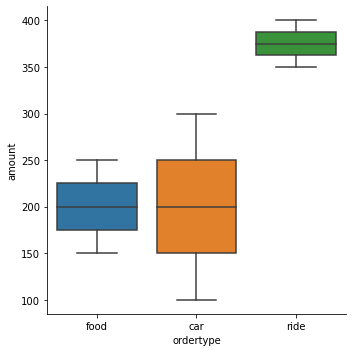

In [10]:
import seaborn as sns
sns.catplot(data=df55, x='ordertype',y='amount', kind='box')

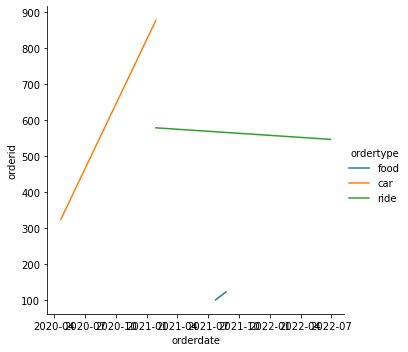

In [11]:
import matplotlib.pyplot as plt


sns.relplot(data=df55, x='orderdate',y='orderid', kind='line', hue='ordertype')

# WINDOW FUNCTIONS IN PANDAS

In [14]:
pip install matplotlib pandas ffn

In [17]:
import datetime
import random

import ffn
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [18]:
tickers = [
    "AAPL",  # apple
    "DIS",  # disney
    "NKE",  # nike
    "TSLA",  # tesla
]

# get stock price data
prices = ffn.get(tickers, start="2018-01-01")

# convert data into 'long' table format for purposes of this exercise
prices = prices.melt(ignore_index=False, var_name="ticker", value_name="closing_price")

# reset index to make 'Date' a column
prices = prices.reset_index()

# display 5 example rows in the dataset
prices.sample(5).sort_index()

,Date,ticker,closing_price
602,2020-05-26,aapl,78.205727
2364,2018-04-13,nke,64.582207
3435,2022-07-15,nke,104.699997
3667,2018-11-23,tsla,65.166000
4220,2021-02-05,tsla,852.229980


In [19]:
import sqlite3

# create connection to in memory sqlite db
with sqlite3.connect(":memory:") as conn:

    # save prices dataframe to sqlite db
    prices.to_sql(name="prices", con=conn, index=False)
    
ex1_sql_query = """
SELECT
    date(Date) as Date
    , ticker
    , closing_price
    , MAX(closing_price) OVER(PARTITION BY ticker) as max_price
FROM
    prices
"""

# use pandas read_sql to execute the query and return a dataframe
ex1_sql = pd.read_sql(ex1_sql_query, con=conn)
ex1_sql


,Date,ticker,closing_price,max_price
0,2018-01-02,aapl,41.075405,181.511703
1,2018-01-03,aapl,41.068249,181.511703
2,2018-01-04,aapl,41.259010,181.511703
3,2018-01-05,aapl,41.728756,181.511703
4,2018-01-08,aapl,41.573761,181.511703
...,...,...,...,...
4583,2022-07-18,tsla,721.640015,1229.910034
4584,2022-07-19,tsla,736.590027,1229.910034
4585,2022-07-20,tsla,742.500000,1229.910034
4586,2022-07-21,tsla,815.119995,1229.910034


In [23]:
# add new column
ex1_pandas["max_price"] = ex1_pandas.groupby("ticker")["closing_price"].transform("max")

ex1_pandas

,Date,ticker,closing_price,max_price
0,2018-01-02,aapl,41.075405,181.511703
1,2018-01-03,aapl,41.068249,181.511703
2,2018-01-04,aapl,41.259010,181.511703
3,2018-01-05,aapl,41.728756,181.511703
4,2018-01-08,aapl,41.573761,181.511703
...,...,...,...,...
4583,2022-07-18,tsla,721.640015,1229.910034
4584,2022-07-19,tsla,736.590027,1229.910034
4585,2022-07-20,tsla,742.500000,1229.910034
4586,2022-07-21,tsla,815.119995,1229.910034


In [41]:
# add new column - 28 days moving average
ex1_pandas["ma_28d"] = ex1_pandas.sort_values("Date").groupby("ticker")["closing_price"].transform(lambda x: x.rolling(28, min_periods=1).mean())

ex1_pandas.groupby('ticker').describe(percentiles=[])

ex1_pandas.describe()

,closing_price,max_price,ma_28d
count,4588.000000,4588.000000,4588.000000
mean,173.962953,447.420734,171.606044
std,210.945520,451.920731,207.865865
min,34.414230,176.351196,37.286613
25%,70.959391,180.221577,69.584946
50%,112.271061,191.710854,112.458449
75%,149.409996,458.910011,148.072646
max,1229.910034,1229.910034,1106.632143


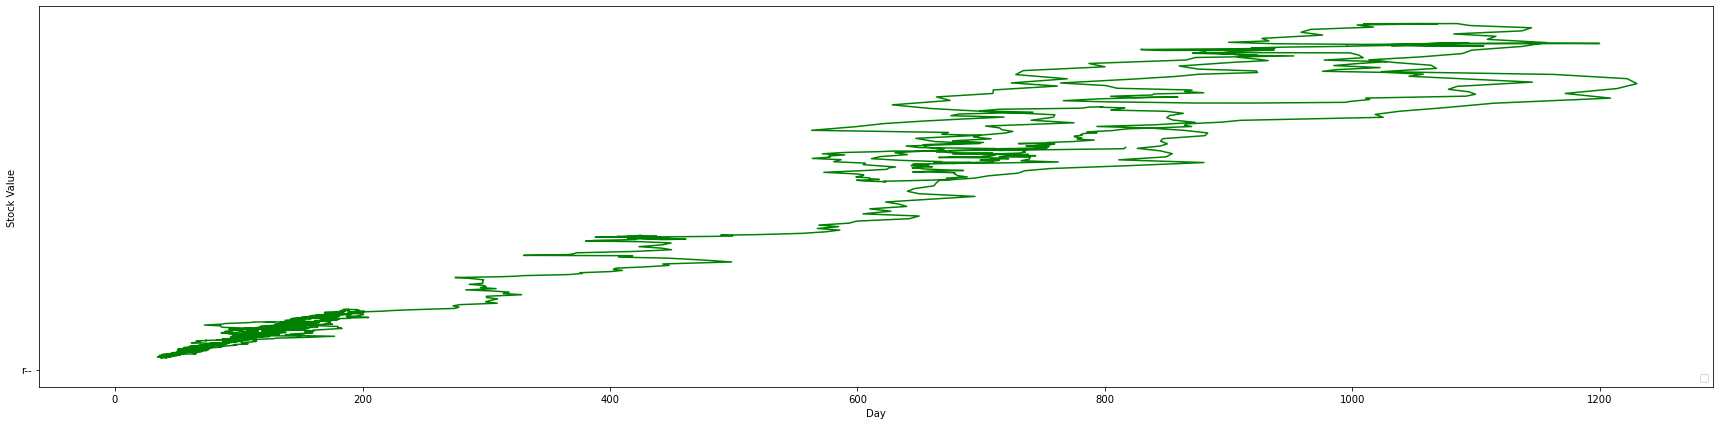

In [55]:
plt.figure(figsize=(30,7))
# sns.relplot(data=ex1_pandas[ex1_pandas['ticker']=='tsla'], x="Date",y='closing_price', kind='line')
plt.xlabel("Day")
plt.ylabel("Stock Value")
plt.legend(labels=['Closing Price','Moving average for a month'], loc='lower right')
plt.plot(ex1_pandas['closing_price'],ex1_pandas['ma_28d'],'g-','r--')
plt.show()

In [75]:
ex2_pandas=ex1_pandas.melt(['Date','ticker','max_price'],var_name='cols',value_name='vals')
ex2_pandas

,Date,ticker,max_price,cols,vals
0,2018-01-02,aapl,181.511703,closing_price,41.075405
1,2018-01-03,aapl,181.511703,closing_price,41.068249
2,2018-01-04,aapl,181.511703,closing_price,41.259010
3,2018-01-05,aapl,181.511703,closing_price,41.728756
4,2018-01-08,aapl,181.511703,closing_price,41.573761
...,...,...,...,...,...
9171,2022-07-18,tsla,1229.910034,ma_28d,701.504286
9172,2022-07-19,tsla,1229.910034,ma_28d,702.216073
9173,2022-07-20,tsla,1229.910034,ma_28d,702.819645
9174,2022-07-21,tsla,1229.910034,ma_28d,706.248217


<Figure size 1080x360 with 0 Axes>

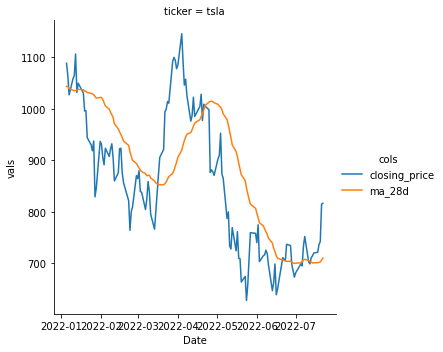

In [76]:
# from datetime import datetime
# check34='24/07/2022'
# check35=datetime.strptime(check34, '%d/%m/%Y')
plt.figure(figsize=(15,5))
sns.relplot(data=ex2_pandas[(ex2_pandas['ticker']=='tsla') & (ex2_pandas['Date']>'2022-01-04')], x='Date', y='vals', hue='cols', row='ticker', kind='line')

In [83]:
grp12=ex2_pandas.sort_values(by='Date', ascending=False).groupby(['cols','ticker']).agg({'max_price':'mean','vals':['mean','median']})
grp12

max_price        vals            
                             mean        mean      median
cols          ticker                                     
closing_price aapl     181.511703   91.888471   77.088394
              dis      201.910004  133.263474  130.159286
              nke      176.351196  105.146862   95.671448
              tsla    1229.910034  365.553005  154.255997
ma_28d        aapl     181.511703   90.656126   74.131242
              dis      201.910004  133.396149  130.052743
              nke      176.351196  104.615217   94.822592
              tsla    1229.910034  357.756684  138.283001

<AxesSubplot:xlabel='closing_price', ylabel='Density'>

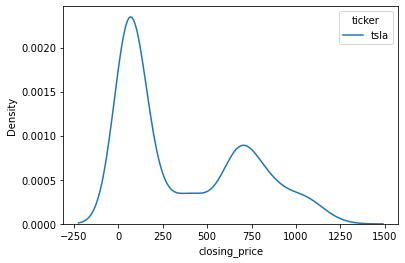

In [90]:
sns.kdeplot(data=ex1_pandas[ex1_pandas['ticker']=='tsla'], x='closing_price', hue='ticker')

In [95]:
grp2=ex1_pandas.groupby(by='ticker').describe().T

In [100]:
grp2.reset_index(inplace=True)
grp2.rename(columns={'level_0':'pricing_var','level_1':'statistic'}, inplace=True)
grp2

ticker,pricing_var,statistic,aapl,dis,nke,tsla
0,closing_price,count,1147.000000,1147.000000,1147.000000,1147.000000
1,closing_price,mean,91.888471,133.263474,105.146862,365.553005
2,closing_price,std,45.685406,28.193125,31.888679,352.606130
3,closing_price,min,34.414230,85.760002,59.830059,35.793999
4,closing_price,25%,48.629532,109.590672,79.750603,61.767000
5,closing_price,50%,77.088394,130.159286,95.671448,154.255997
6,closing_price,75%,133.365234,149.500000,132.316574,694.065002
7,closing_price,max,181.511703,201.910004,176.351196,1229.910034
8,max_price,count,1147.000000,1147.000000,1147.000000,1147.000000
9,max_price,mean,181.511703,201.910004,176.351196,1229.910034


In [103]:
ex1_pandas['previous_close']=ex1_pandas.sort_values(by='Date').groupby('ticker')['closing_price'].shift(1)
ex1_pandas

,Date,ticker,closing_price,max_price,ma_28d,previous_close
0,2018-01-02,aapl,41.075405,181.511703,41.075405,NaN
1,2018-01-03,aapl,41.068249,181.511703,41.071827,41.075405
2,2018-01-04,aapl,41.259010,181.511703,41.134221,41.068249
3,2018-01-05,aapl,41.728756,181.511703,41.282855,41.259010
4,2018-01-08,aapl,41.573761,181.511703,41.341036,41.728756
...,...,...,...,...,...,...
4583,2022-07-18,tsla,721.640015,1229.910034,701.504286,720.200012
4584,2022-07-19,tsla,736.590027,1229.910034,702.216073,721.640015
4585,2022-07-20,tsla,742.500000,1229.910034,702.819645,736.590027
4586,2022-07-21,tsla,815.119995,1229.910034,706.248217,742.500000


In [110]:
ex1_pandas['percent_gain']=ex1_pandas.sort_values(by='Date').groupby('ticker')['closing_price'].transform(lambda x: x/x.shift(1) -1)
ex1_pandas

,Date,ticker,closing_price,max_price,ma_28d,previous_close,percent_gain
0,2018-01-02,aapl,41.075405,181.511703,41.075405,NaN,NaN
1,2018-01-03,aapl,41.068249,181.511703,41.071827,41.075405,-0.000174
2,2018-01-04,aapl,41.259010,181.511703,41.134221,41.068249,0.004645
3,2018-01-05,aapl,41.728756,181.511703,41.282855,41.259010,0.011385
4,2018-01-08,aapl,41.573761,181.511703,41.341036,41.728756,-0.003714
...,...,...,...,...,...,...,...
4583,2022-07-18,tsla,721.640015,1229.910034,701.504286,720.200012,0.001999
4584,2022-07-19,tsla,736.590027,1229.910034,702.216073,721.640015,0.020717
4585,2022-07-20,tsla,742.500000,1229.910034,702.819645,736.590027,0.008023
4586,2022-07-21,tsla,815.119995,1229.910034,706.248217,742.500000,0.097805
